<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-letadylka-prochazka-belohlavek/blob/main/Coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coordinates
- loads coordinates
- transforms them
- builds a distance matrix
- builds a adjacency matrix with n-nearest neighbors

In [1]:
# Libraries
import re
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError:
    data_prefix = "data/"

Mounted at /content/drive/


In [3]:
# Calculate the distance between two places
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in km
    distance = R * c
    return distance

def convert_to_decimal_degrees(coord):
    # Extract degrees, minutes, and direction for latitude and longitude
    lat_deg = int(coord[0:2])
    lat_min = int(coord[2:4])
    lat_sec = int(coord[4:6])
    lat_dir = coord[6]

    lon_deg = int(coord[7:10])
    lon_min = int(coord[10:12])
    lon_sec = int(coord[12:14])
    lon_dir = coord[14]

    # Convert to decimal degrees
    lat_decimal = lat_deg + (lat_min / 60) + (lat_sec / 3600)
    lon_decimal = lon_deg + (lon_min / 60) + (lon_sec / 3600)

    # Adjust for N/S and E/W
    if lat_dir == 'S':
        lat_decimal = -lat_decimal
    if lon_dir == 'W':
        lon_decimal = -lon_decimal

    return lat_decimal, lon_decimal


In [12]:

char_points = '/content/drive/My Drive/SU2/CHARACTERISTIC_POINTS.txt'


coordinate_pattern = r'\d{6}[NS]\d{7}[EW]'

coordinates_text = [] # Will contain tuples of int, Latitude and Longitude


amount_to_read = 100
k = 0
# Load data from a file
with open(char_points, 'r') as f:
    for line in f:
      matches = re.findall(coordinate_pattern, line)
      if matches != []:
        coordinates_text.append(matches[0])
        k += 1
      if k >= amount_to_read:
        break

number_of_points = len(coordinates_text)



# Convert to numbers
coordinates = []
for coord in coordinates_text:
  lat, lon = convert_to_decimal_degrees(coord) # Converth positions to numbers
  coordinates.append((lat, lon))


# Build ad matrix
adjacency_matrix = np.zeros((number_of_points, number_of_points))

# Build distance matrix
distance_matrix = np.zeros((number_of_points, number_of_points))
for i in range(number_of_points):
  for j in range(number_of_points):
    if i != j:
      lat1, lon1 = coordinates[i]
      lat2, lon2 = coordinates[j]
      distance_matrix[i, j] = haversine(lat1, lon1, lat2, lon2)

# Find 10 closest neighbors
n = 10
for i in range(number_of_points):
  sorted_neighbors = np.argsort(distance_matrix[i])[:n] # Indicies of the closest neighbors
  for neighbor in sorted_neighbors:
    adjacency_matrix[i, neighbor] = 1  # Fill in the adjacency matrix


# Replace diagonal elements with zero
np.fill_diagonal(adjacency_matrix, 0)
print(adjacency_matrix)


np.save('/content/drive/MyDrive/SU2/small_dist_mat.npy', distance_matrix)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]]


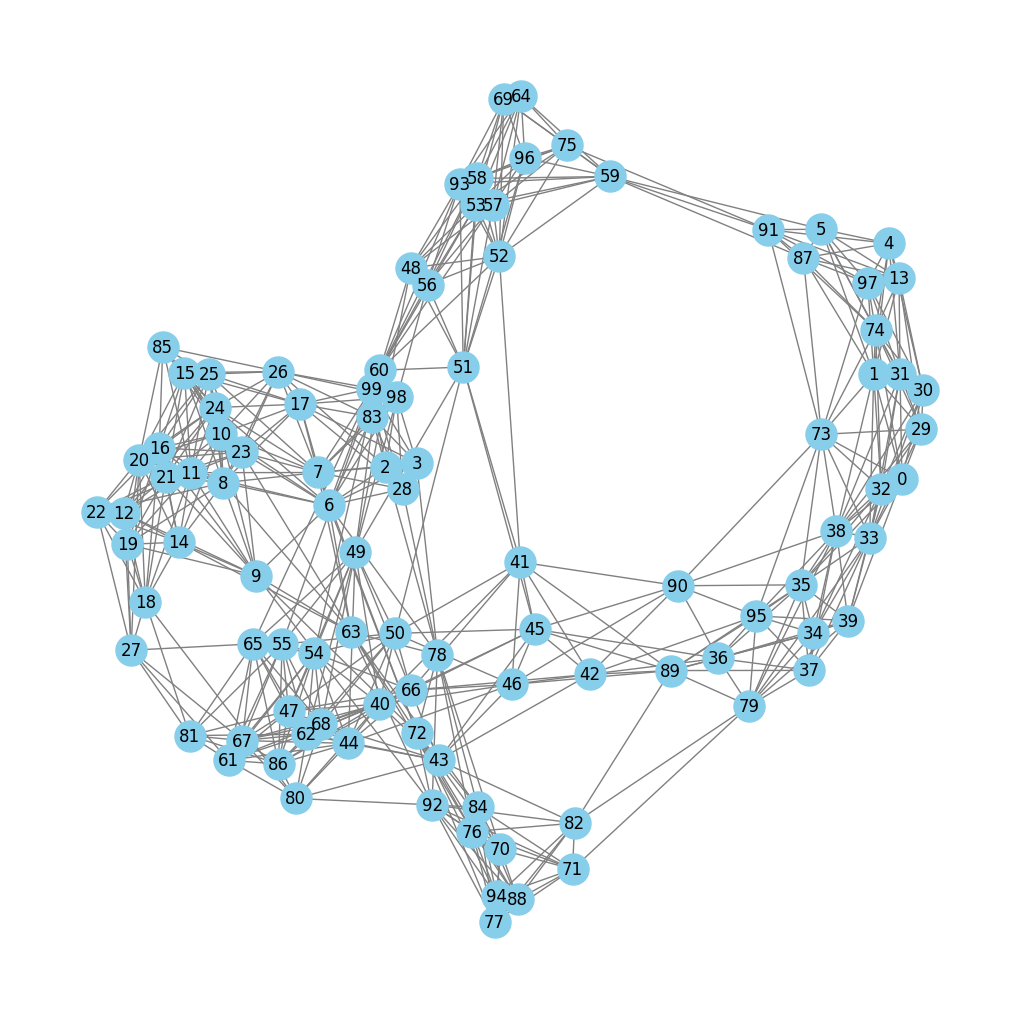

In [7]:
# Visualizing the created graph
G = nx.from_numpy_array(adjacency_matrix ) # Create a graph
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G) # Layout for positioning nodes
# pos = nx.circular_layout(G) # Layout for positioning nodes
nx.draw(G, pos, with_labels= True, node_color='skyblue', node_size=500, edge_color='gray')
plt.show()

